## Impute empty data

We found some datapoint with empty Volume.
Luckily, we have daily data. We calculated the different between total hourly volume from each day.
Then impute the values that made total hourly equal to daily in each empty cells

In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
filename1 ='../../data/stock_price/TSLA_30m_2y.csv'
filename2 ='../../data/stock_price/TSLA.csv'

tsla_hour = pd.read_csv(filename1)
tsla_day = pd.read_csv(filename2)

tsla_hour.shape, tsla_day.shape

((5089, 8), (720, 7))

In [3]:
tsla_hour["Datetime"] = pd.to_datetime(tsla_hour["Datetime"], utc=True)
tsla_hour['Date'] = tsla_hour['Datetime'].dt.date

tsla_day["Date"] = pd.to_datetime(tsla_day["Date"])


In [4]:
# check daily data difference

dates = [datetime.date(2018, 7, 20),
         datetime.date(2018, 7, 23),
         datetime.date(2018, 7, 24),
         datetime.date(2018, 11, 19),
         datetime.date(2018, 11, 20),
         datetime.date(2018, 11, 23)]
         
for date in dates:
    
    vol_hour = tsla_hour[tsla_hour['Date'] == date]['Volume'].sum()
    vol_day = int(tsla_day[tsla_day['Date'] == date]['Volume'])

    print("Sum of hourly volumes: {}, Total daily volume {}".format(vol_hour, vol_day))


Sum of hourly volumes: 5126618, Total daily volume 5162200
Sum of hourly volumes: 10819760, Total daily volume 10992900
Sum of hourly volumes: 9399502, Total daily volume 9590800
Sum of hourly volumes: 6700706, Total daily volume 9708900
Sum of hourly volumes: 4779987, Total daily volume 8004700
Sum of hourly volumes: 2240664, Total daily volume 4202600


/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  del sys.path[0]


In [4]:
# 112 rows in hourly data has 0 volume
# none of the daily data has 0 volume
tsla_hour[tsla_hour['Volume']==0].shape, tsla_day[tsla_day['Volume']==0].shape

((112, 9), (0, 7))

In [6]:
tsla_hour.tail(2)


,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
5087,2019-04-16 18:30:00+00:00,274.75,275.00,271.81,272.26,675595,0,0,2019-04-16
5088,2019-04-16 19:30:00+00:00,272.27,273.67,271.66,273.31,707819,0,0,2019-04-16


In [7]:
tsla_day.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume
718,2019-04-01,282.619995,289.200012,281.279999,289.179993,289.179993,8110400
719,2019-04-02,288.299988,289.440002,283.880005,285.880005,285.880005,5478900


In [141]:
def impute(hourdat, daydat):
    if len(hourdat)>0:
        
        
        if len(hourdat) != 7:
            print(hourdat.Date.iloc[0], len(hourdat))
            dtotal = daydat.Volume[daydat.Date == hourdat.Date.iloc[0]].iloc[0]
        
            htotal = sum(hourdat.Volume)
#         print(dtotal, htotal)
        diff = dtotal - htotal
        hourdat.loc[hourdat.Volume > htotal,'Volume'] = 0
        icell = sum(hourdat.Volume == 0)
        
        
        if icell > 0: 
            hourdat['Volume'] = hourdat.Volume.replace(0, diff/icell)  # impute by diff of total devide by all empty cell
    #         print(icell, diff/icell, sum(hourdat.Volume == 0))
    return hourdat

In [ ]:
group = tsla_hour[tsla_hour.Date < datetime.date(2019, 4, 2)].groupby('Date')
group.groups[0]

In [142]:
print('empty cells, before', sum(tsla_hour.Volume == 0))
tsla_hour2 = tsla_hour[tsla_hour.Date < datetime.date(2019, 4, 2)].groupby('Date').apply(lambda x: impute(x, tsla_day))
print('empty cells, after', sum(tsla_hour2.Volume == 0))

empty cells, before 112


/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  import sys
/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  import sys
/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. 

2016-11-25 4


/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  import sys
/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  import sys
/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. 

/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  import sys
/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  import sys
/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. 

2017-07-03 4
2017-11-24 4


/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  import sys


2018-07-03 4
2018-08-07 6


/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  import sys
/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  import sys
/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. 

2018-11-23 4
2018-11-29 5
2018-12-24 4
empty cells, after 0


In [118]:
dates = [datetime.date(2017, 1, 25),
         datetime.date(2018, 7, 23),
         datetime.date(2018, 7, 24),
         datetime.date(2018, 11, 19),
         datetime.date(2018, 11, 20)]
         
for date in dates:
    
    vol_hour = tsla_hour2[tsla_hour2['Date'] == date]['Volume'].sum()
    vol_day = int(tsla_day[tsla_day['Date'] == date]['Volume'])

    print("Sum of hourly volumes: {}, Total daily volume {}".format(vol_hour, vol_day))


Sum of hourly volumes: 5142600.0, Total daily volume 5142600
Sum of hourly volumes: 10819760.0, Total daily volume 10992900
Sum of hourly volumes: 9399502.0, Total daily volume 9590800
Sum of hourly volumes: 9708900.0, Total daily volume 9708900
Sum of hourly volumes: 8004700.0, Total daily volume 8004700


/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  # Remove the CWD from sys.path while we load stuff.


In [119]:
tsla_hour2.to_csv('../../data/stock_price/TSLA_30m_2y_imputed.csv')

In [120]:
sum(tsla_hour2.Volume == 0)

0

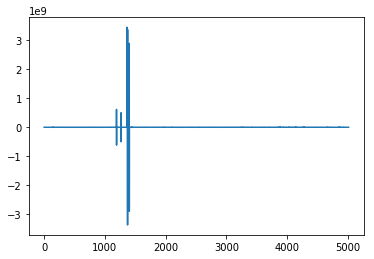

In [135]:
import matplotlib.pyplot as plt
plt.plot(tsla_hour2.Volume)
plt.show()

In [155]:
def addMissingRow(dat):
    if len(dat) < 7:
        missing = [14, 15, 16, 17, 18, 19, 20]
#         missing.remove([x.hour for x in dat.Datetime])
        print([x.hour for x in dat.Datetime])
    
tsla_hour3 = tsla_hour2.groupby('Date').apply(lambda x: addMissingRow(x))


[14, 15, 16, 17]
[13, 14, 15, 17]
[14, 15, 16, 18]
[13, 14, 15, 17]
[13, 14, 15, 16, 17, 19]
[14, 15, 16, 18]
[14, 15, 18, 19, 20]
[14, 15, 16, 18]
